# Prueba de frecuencias

Esta prueba verifica si los números $u_i$ siguen una distribución $U(0,1)$ dividiendo el intervalo $[0,1)$ en $k$ subintervalos de igual longitud.

---

### Hipótesis

$$H_0: u_i \sim U(0,1)$$

$$H_a: u_i \nsim U(0,1)$$

---

### Estadístico de prueba

Se dividen los datos en $k = 5$ intervalos de igual amplitud. Para cada intervalo $j$ se calcula:

- **Frecuencia observada** $f_o$: número de datos que caen en el intervalo.
- **Frecuencia esperada** $f_e = \dfrac{N}{k}$: frecuencia bajo $H_0$.

El estadístico chi-cuadrada es:

$$\chi^2 = \sum_{j=1}^{k} \frac{(f_o - f_e)^2}{f_e}$$

---

### Criterio de decisión

Con $k - 1$ grados de libertad:

$$\text{Si } \chi^2 < \chi^2_{\alpha,\, k-1} \Rightarrow \text{No se rechaza } H_0$$

$$\text{Si } \chi^2 \geq \chi^2_{\alpha,\, k-1} \Rightarrow \text{Se rechaza } H_0 \phantom{No}$$

## Datos de la Tabla 3.1

In [51]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd

In [52]:
ui = np.array([
    0.78961, 0.05230, 0.10699, 0.55877, 0.14151,
    0.76086, 0.12079, 0.27738, 0.65726, 0.79269,
    0.80548, 0.82654, 0.29453, 0.20852, 0.42989,
    0.58518, 0.98611, 0.34488, 0.34358, 0.11537,
    0.89898, 0.57880, 0.67621, 0.05010, 0.00121,
    0.28269, 0.73059, 0.70119, 0.18284, 0.49962,
    0.38618, 0.76910, 0.68334, 0.55170, 0.10850,
    0.79982, 0.45679, 0.21631, 0.87616, 0.55743,
    0.58962, 0.33216, 0.03185, 0.61168, 0.09264,
    0.69623, 0.17028, 0.05475, 0.91512, 0.76262,
    0.29931, 0.30861, 0.83358, 0.51781, 0.03272,
    0.57410, 0.26593, 0.85903, 0.43308, 0.35286,
    0.24000, 0.65559, 0.38507, 0.90829, 0.94187,
    0.93655, 0.88809, 0.81772, 0.36982, 0.19904,
    0.54325, 0.62400, 0.09133, 0.41678, 0.33954,
    0.58244, 0.85853, 0.88752, 0.33729, 0.15506,
    0.23949, 0.53559, 0.33381, 0.49383, 0.75103,
    0.19962, 0.65002, 0.74579, 0.79113, 0.63453,
    0.19147, 0.40644, 0.08128, 0.73435, 0.22724,
    0.22287, 0.07281, 0.64183, 0.44267, 0.72102
])

## Construir los intervalos y calcular frecuencias

In [53]:
k = 5
limites = np.linspace(0, 1, k + 1)

intervalos = []
fo_lista = []

for i in range(k):
    a = limites[i]
    b = limites[i + 1]
    etiqueta = f"[{a:.1f} - {b:.1f})"
    if i == k - 1:
        fo = np.sum((ui >= a) & (ui <= b))
    else:
        fo = np.sum((ui >= a) & (ui < b))
    intervalos.append(etiqueta) # .append() agrega un elemento al final de la lista
    fo_lista.append(fo) # .append() agrega un elemento al final de la lista

fo_lista = np.array(fo_lista) # np.array() crea un arreglo numérico array

## Frecuencia esperada

Bajo $H_0$, cada intervalo tiene probabilidad $\dfrac{1}{k}$, por lo tanto:

$$f_e = \frac{N}{k} = \frac{100}{5} = 20$$

In [54]:
N = len(ui)
alpha = 0.05
X_barra = np.sum(ui) / N
fe = N / k
print(f"Frecuencia esperada por intervalo: fe = {fe}")

Frecuencia esperada por intervalo: fe = 20.0


## Tabla de resultados


In [55]:
contribucion = (fo_lista - fe)**2 / fe

tabla = pd.DataFrame({ # pd.DataFrame() crea una tabla de datos (filas y columnas)
    "Intervalo"           : intervalos,
    "Frec. observada (fo)": fo_lista,
    "Frec. esperada (fe)" : [fe] * k,
    "(fo - fe)^2 / fe"    : contribucion
})

total = pd.DataFrame([{
    "Intervalo"           : "TOTAL",
    "Frec. observada (fo)": fo_lista.sum(),
    "Frec. esperada (fe)" : fe * k,
    "(fo - fe)^2 / fe"    : contribucion.sum()
}])

tabla = pd.concat([tabla, total], ignore_index=True) # pd.concat() une varios DataFrames en uno solo
print(tabla.to_string(index=False))

  Intervalo  Frec. observada (fo)  Frec. esperada (fe)  (fo - fe)^2 / fe
[0.0 - 0.2)                    21                 20.0              0.05
[0.2 - 0.4)                    22                 20.0              0.20
[0.4 - 0.6)                    19                 20.0              0.05
[0.6 - 0.8)                    23                 20.0              0.45
[0.8 - 1.0)                    15                 20.0              1.25
      TOTAL                   100                100.0              2.00


## Estadístico $\chi^2$ y valor crítico

$$\chi^2 = \sum_{j=1}^{k} \frac{(f_o - f_e)^2}{f_e}$$

Grados de libertad: $gl = k - 1 = 4$

In [56]:
chi2_calc = contribucion.sum()
gl = k - 1
chi2_crit = stats.chi2.ppf(1 - alpha, df=gl) # stats.chi2.ppf() calcula el valor crítico de chi-cuadrado
p_chi2 = stats.chi2.sf(chi2_calc, df=gl) # stats.chi2.sf() calcula la probabilidad en la cola derecha (p-valor)

print(f"chi2 calculado = {chi2_calc:.6f}")
print(f"chi2 critico = {chi2_crit:.6f}  (alpha={alpha}, gl={gl})")
print(f"p-valor = {p_chi2:.6f}")

chi2 calculado = 2.000000
chi2 critico = 9.487729  (alpha=0.05, gl=4)
p-valor = 0.735759


## Decisión $\chi^2$

$$\text{Si } \chi^2 < \chi^2_{\alpha,\, k-1} \Rightarrow \text{No se rechaza } H_0$$

In [57]:
print("Decision chi^2")
if chi2_calc < chi2_crit:
    print(f"chi2 = {chi2_calc:.4f} < chi2_crit = {chi2_crit:.4f}")
    print("No se rechaza H0: los numeros siguen una distribucion U(0,1)")
else:
    print(f"chi2 = {chi2_calc:.4f} >= chi2_crit = {chi2_crit:.4f}")
    print("Se rechaza H0: los numeros NO siguen una distribucion U(0,1)")

Decision chi^2
chi2 = 2.0000 < chi2_crit = 9.4877
No se rechaza H0: los numeros siguen una distribucion U(0,1)


## Gráficas

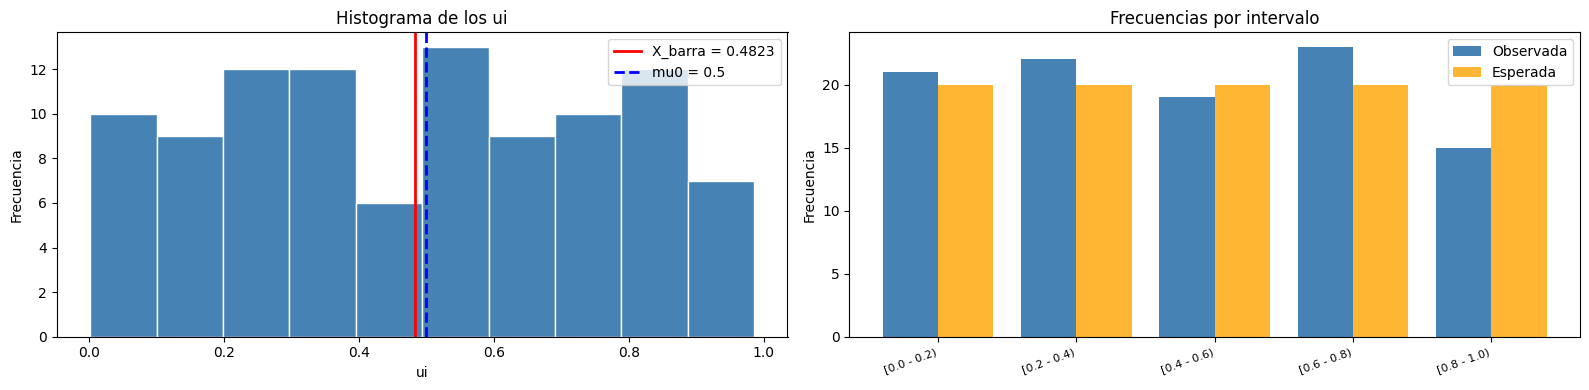

In [58]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

axes[0].hist(ui, bins=10, color='steelblue', edgecolor='white')
axes[0].axvline(X_barra, color='red',  linewidth=2, label=f'X_barra = {X_barra:.4f}')
axes[0].axvline(0.5, color='blue', linewidth=2, linestyle='--', label='mu0 = 0.5')
axes[0].set_title('Histograma de los ui')
axes[0].set_xlabel('ui')
axes[0].set_ylabel('Frecuencia')
axes[0].legend()

# Opcional

x_pos = np.arange(k) # np.arange() genera una secuencia de números en un rango
axes[1].bar(x_pos - 0.2, fo_lista, width=0.4, label='Observada', color='steelblue')
axes[1].bar(x_pos + 0.2, [fe]*k, width=0.4, label='Esperada', color='orange', alpha=0.8)
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(intervalos, rotation=20, ha='right', fontsize=8)
axes[1].set_title('Frecuencias por intervalo')
axes[1].set_ylabel('Frecuencia')
axes[1].legend()

plt.tight_layout()
plt.show()